## Imports

In [15]:
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## Chargement du  jeu de données

In [2]:
df = joblib.load(open('../../df_sections.pickle','rb'))

In [13]:
df.head()

,index,titres,section_html,num_etude,section_clean_1
0,0,1. PRESENTATION DU DEMANDEUR,"</span></h3>\n<p><span class=""font20"">Commune ...",100689,commune de saint yrieix la perche etude d impact
1,1,1.1. Présentation du groupe URBASOLAR,"</span></h5>\n<p><span class=""font45"">La Socié...",100689,la societe urba est une societe de projet qui ...
2,2,1.2. Références et expérience,"</span><br><br><span class=""font47"" style=""fon...",100689,
3,3,1.2.1. Les Appels d'Offres,"</span></h5></li></ul>\n<p><span class=""font45...",100689,le groupe urbasolar est un des principaux laur...
4,4,1.2.2. Les Centrales au Sol,"</span></h5>\n</div><br clear=""all"">\n<div><im...",100689,parc solaire avec trackers mwc vallerargues fo...


## KeyBoost

In [4]:
from keyBoost import *
import spacy

In [5]:
# stopwords
nlp = spacy.load('fr_core_news_sm')
stopwords = nlp.Defaults.stop_words

In [6]:
keyboost = KeyBoost(transformers_model='distilbert-base-nli-mean-tokens')

In [8]:
initial_text = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs.[1] It infers a
         function from labeled training data consisting of a set of training examples.[2]
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias).
      """


In [9]:
keywords = keyboost.extract_keywords(text=initial_text,
                       language='fr',
                       n_top=6,
                       keyphrases_ngram_max=2,
                       stopwords=stopwords)

C:\Users\zakaria.bekkar\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [11]:
[k[0] for k in keywords]

['learning algorithm',
 'input-output pairs.',
 'Supervised learning',
 'that maps',
 'machine learning',
 'algorithm analyzes']

In [33]:
def apply_keyboost(text,language='fr',n_top=6,stopwords=stopwords):
  
    try:
        keywords = keyboost.extract_keywords(text=text,
                       language='fr',
                       n_top=6,
                       keyphrases_ngram_max=2,
                       stopwords=stopwords)
        return [k[0] for k in keywords]
        
    except:
        
        return None
    
    
    

In [23]:
ok_study = [100689,100707,102316,106168,110277,114799,118071,120638] 

In [24]:
df[df['num_etude'].isin(ok_study)][:3]

,index,titres,section_html,num_etude,section_clean_1
0,0,1. PRESENTATION DU DEMANDEUR,"</span></h3>\n<p><span class=""font20"">Commune ...",100689,commune de saint yrieix la perche etude d impact
1,1,1.1. Présentation du groupe URBASOLAR,"</span></h5>\n<p><span class=""font45"">La Socié...",100689,la societe urba est une societe de projet qui ...
2,2,1.2. Références et expérience,"</span><br><br><span class=""font47"" style=""fon...",100689,


In [28]:
df[df['num_etude'].isin(ok_study)][:3]['section_clean_1'].apply(apply_keyboost)

0    [yrieix perche, saint yrieix, commune, impact,...
1    [groupe urbasolar, panneaux photovoltaiques, c...
2                                                 None
Name: section_clean_1, dtype: object

In [30]:
df_demoday = df[df['num_etude'].isin(ok_study)]

In [ ]:
df_demoday['keywords'] = df_demoday['section_clean_1'].apply(apply_keyboost)

Warning! Exception: object of type 'NoneType' has no len() generated by the following text: 'None' 
Warning! Exception: object of type 'NoneType' has no len() generated by the following text: 'None' 


In [32]:
df_demoday

,index,titres,section_html,num_etude,section_clean_1
0,0,1. PRESENTATION DU DEMANDEUR,"</span></h3>\n<p><span class=""font20"">Commune ...",100689,commune de saint yrieix la perche etude d impact
1,1,1.1. Présentation du groupe URBASOLAR,"</span></h5>\n<p><span class=""font45"">La Socié...",100689,la societe urba est une societe de projet qui ...
2,2,1.2. Références et expérience,"</span><br><br><span class=""font47"" style=""fon...",100689,
3,3,1.2.1. Les Appels d'Offres,"</span></h5></li></ul>\n<p><span class=""font45...",100689,le groupe urbasolar est un des principaux laur...
4,4,1.2.2. Les Centrales au Sol,"</span></h5>\n</div><br clear=""all"">\n<div><im...",100689,parc solaire avec trackers mwc vallerargues fo...
...,...,...,...,...,...
4354,158,France de Beaucouzé (49) - données 1981 à 2010),"</span></p>\n<div>\n<ul style=""list-style:none...",120638,jours de brouillard jours d orage jours de nei...
4355,159,Mérimée),"</span></p>\n<table border=""1"">\n<tr><td style...",120638,parametre unite methode valeur limite de l ap ...
4356,160,(Source : 2B RECYCLAGE),correspondent d’une part aux composantes de l...,120638,correspondent d une part aux composantes de l ...
4357,161,dynamiques d’évolution,"</span></p></li></ul>\n<p><span class=""font5"" ...",120638,legende sans objet sensibilite faible sensibil...


###### index normalization

In [41]:
df.index = range(len(df))

##### informations about some key properties of the df

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21769 entries, 0 to 21768
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            21769 non-null  int64 
 1   titres           21769 non-null  object
 2   section_html     21655 non-null  object
 3   num_etude        21769 non-null  int64 
 4   section_clean_1  21655 non-null  object
dtypes: int64(2), object(3)
memory usage: 850.5+ KB


##### diagnostic on missing values  and dropping

In [43]:
df.isna().sum()

index                0
titres               0
section_html       114
num_etude            0
section_clean_1    114
dtype: int64

In [44]:
df.dropna(inplace=True)

#### diagnostic on sections propreties

###### word count

In [47]:
df['section_clean_wc'] = df['section_clean_1'].apply(
    lambda x : len(x.split(' ')))

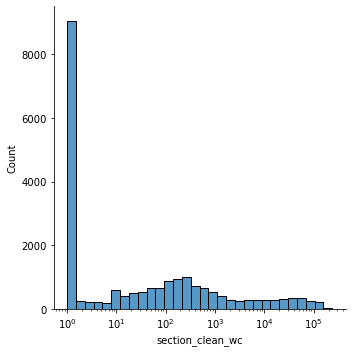

In [48]:
sns.displot(df['section_clean_wc'],log_scale=True)

In [49]:
len(df[df['section_clean_wc'].between(100,1000)])/len(df)

0.20609558993304086

###### empty section

In [56]:
len(df[df['section_clean_1'] == ''])/len(df)

# 36% of detected sections are empty

0.3660124682521358

In [57]:
# dropping empty sections

df = df[df['section_clean_1'] != '']

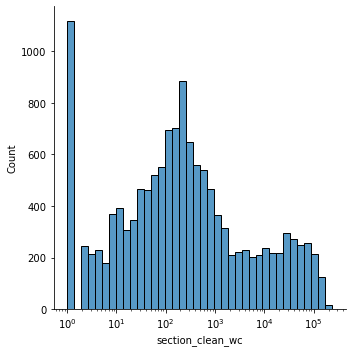

In [58]:
sns.displot(df['section_clean_wc'],log_scale=True)

###### tiny section

In [59]:
df[df['section_clean_wc'] <=10]

,index,titres,section_html,num_etude,section_clean_1,section_clean_wc
0,0,1. PRESENTATION DU DEMANDEUR,"</span></h3>\n<p><span class=""font20"">Commune ...",100689,commune de saint yrieix la perche etude d impact,9
109,109,Etude d'impact,"</span></p>\n<ul style=""list-style:none;""><li>...",100689,contexte paysager,2
287,287,4.,"</span><span class=""font20"" style=""font-style:...",100689,analyse comparative,2
300,300,6.2.2.1. Définition,non,100689,non,1
603,283,4.,"</span><span class=""font24"" style=""font-style:...",100707,analyse comparative,2
...,...,...,...,...,...,...
21497,233,6.3.2.2. MESURES,"</span></p></li></ul>\n<p><a name=""bookmark872...",2381564,aucune mesure n est envisagee,5
21498,234,6.3.2.3. INCIDENCES RESIDUELLES,"</span></p></li></ul>\n<p><a name=""bookmark874...",2381564,l incidence residuelle est qualifiee de neglig...,7
21659,395,TABL. 32 - METHODOLOGIES ET CALENDRIER DES PRO...,"</span></a></p>\n<p><span class=""font24"" styl...",2381564,figures,1
21735,471,2,-5 et suivants du code de l’Environnement </sp...,2381564,et suivants du code de l environnement,7


In [60]:
# dropping less than 10 words artefact sections

df = df[df['section_clean_wc']>10]


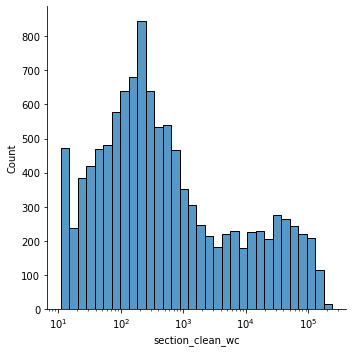

In [61]:
sns.displot(df['section_clean_wc'],log_scale=True)

In [62]:
# taking a random sample of 30 sections to check their postprocessing 
# qualitative properties 

In [63]:
df.drop(axis=1,labels=['index'],inplace=True)
df.index = range(len(df))

In [64]:
# All DF ( except abnormally tiny sections)
df['section_clean_1'].sample(30).values[0]

'vi a mesures liees dans le cadre de la pac vi b mesures prises independamment vii gestion et valorisation des effluents vi la production d effluents vii a effluents lies a l elevage existant vii b effluents lies a l elevage en projet vii cconclusion vi capacite de stockage des effluents vii a evacuation du fumier avicole vii b compostage au champ et epandage du fumier ovin chapitre conditions de remise en etat du site i cadre reglementaire des conditions de remise en etat ii procedures applicables a la remise en etat du site ll l procedure de remise en etat au cours de la vie de l installation procedure de remise en etat suite a l arret definitif de l installation operations de remise en etat du site procedure prealable a l autorisation du site titre ii etude d impact chapitre description des facteurs de l environnement susceptibles d etre affectes de maniere notable par le projet i definition du perimetre de l etude ii environnement humain population cadre de vie et activites socio e

In [79]:
# Target sections
df[df['section_clean_wc'].between(100,1000)]['section_clean_1'].sample(30).values[0]

'identification des principales sources d emissions atmospheriques registre des emissions polluantes selon les donnees du registre francais des emissions polluantes irep seule la societe psa peugeot citro n centre technique de la garenne colombes est recensee a proximite du site mais ses derniers rejets atmospheriques declares datent de reseaux de transports le reseau routier est le principal point d etude de la partie air du projet le projet est situe en bordure du boulevard national rd dont le trafic atteint pratiquement vehicules quotidiennement le transport routier apparait comme le secteur preponderant dans les emissions franciliennes d oxydes d azote et comme la deuxieme source d emission de particules fines pm derriere le secteur residentiel tertiaire ce secteur qui comprend notamment le chauffage est quant a lui le premier emetteur de particules fines pm et d hydrocarbures dans la region ainsi que la deuxieme source d oxydes d azote sur le territoire de la commune de la garenne

###### Study Level Statistics

In [86]:

df['num_etude'].nunique()

103

103 studies in total

In [90]:
num_detected_sections = pd.DataFrame(df.groupby('num_etude').apply(lambda x: len(x)),columns=['# of detected sections'])
num_detected_sections

,# of detected sections
num_etude,
100689,240
100707,239
102316,368
103429,109
106168,30
...,...
2224067,45
2272599,70
2297011,377


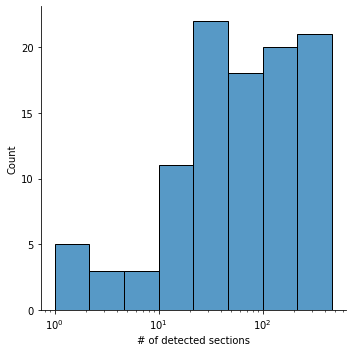

In [93]:
sns.displot(num_detected_sections['# of detected sections'],log_scale=True)

In [96]:
num_detected_sections['# of detected sections'].sum()/len(num_detected_sections)

109.89320388349515

110 sections detected in average

In [101]:
999 in range(100,1001)

True

In [106]:
def acceptable_sections_count(x):
    
    return sum([1 if wc in range(100,1001) else 0 for wc in x['section_clean_wc']])
  
                                  
    

In [107]:
ok_sections = pd.DataFrame(df.groupby('num_etude').apply(acceptable_sections_count),columns=['# of acceptable sections'])
ok_sections

,# of acceptable sections
num_etude,
100689,128
100707,135
102316,156
103429,27
106168,14
...,...
2224067,18
2272599,6
2297011,197


In [113]:
study_analysis = pd.concat(axis=1,objs=[num_detected_sections,ok_sections])
study_analysis['% of acceptable sections'] = study_analysis['# of acceptable sections']/study_analysis['# of detected sections'] * 100
study_analysis

,# of detected sections,# of acceptable sections,% of acceptable sections
num_etude,,,
100689,240,128,53.333333
100707,239,135,56.485356
102316,368,156,42.391304
103429,109,27,24.770642
106168,30,14,46.666667
...,...,...,...
2224067,45,18,40.000000
2272599,70,6,8.571429
2297011,377,197,52.254642


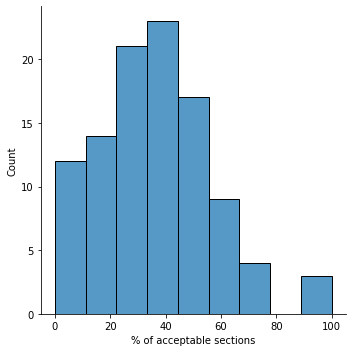

In [114]:
sns.displot(study_analysis['% of acceptable sections'])

In [117]:
len(study_analysis[study_analysis['% of acceptable sections'] >= 50])

26

26 studies out of 103 have more than half of their detected sections as "acceptable"

(The 100% acceptable sections study is an artefact, only 2 sections are detected)

In [118]:
len(study_analysis[study_analysis['% of acceptable sections'] < 50])

77

77 studies out of 103 have less than half of their detected sections as "acceptable"

In [77]:
joblib.dump(df,filename = 'cleaned_working_basis_sections.joblib')

['cleaned_working_basis_sections.joblib']

In [55]:
df_undersample = df[df['section_clean_wc']<10000]

In [50]:
import tqdm

In [57]:
for i in tqdm.tqdm(range(len(df_undersample))):
    
    txt = open('corpus/section{}.txt'.format(i),'w')
    txt.write(df_undersample['section_clean_1'].values[i])
    txt.close()

100%|█████████████████████████████████████████████████████████████████████████████| 9277/9277 [00:11<00:00, 835.49it/s]
